# Breakdown of time required when rendering with NeRF

In [1]:
import os
import json
import numpy as np
import pandas as pd

from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
from notebook_utils import load_mpl_style

load_mpl_style()

In [2]:
project_root = Path(os.getcwd()).parent
results_dir = project_root / "results"

scene_results = defaultdict(dict)

In [3]:
for scene_dir in results_dir.iterdir():
    profile_path = scene_dir / "profile.json"
    if not profile_path.exists():
        print(f"No profile results found for {scene_dir}, skipping...")
        continue
    with open(profile_path, "r") as f:
        profile_results = json.load(f)
    
    scene = scene_dir.stem
    scene_results[scene]["Positional Encoding"] = (
        profile_results["nerf.forward.posi_encoder"]["time"] + profile_results["nerf.forward.view_encoder"]["time"]
    )
    scene_results[scene]["MLP Forward"] = (
        profile_results["nerf.forward.mlp_forward"]["time"] + profile_results["nerf.forward.sigmoid"]["time"] + \
        profile_results["nerf.forward.relu"]["time"]
    )
    scene_results[scene]["Volumetric Rendering"] = (
        profile_results["rendering.render_weight_from_density"]["time"] + \
        profile_results["rendering.colors.accumulate_along_rays"]["time"]
    )

No profile results found for /home/workspace/results/.DS_Store, skipping...


In [4]:
df = pd.DataFrame.from_dict(scene_results, orient="index").sort_index()
df_normalized = df.div(df.sum(axis=1), axis=0)

### Normalized Rendering Time Breakdown
i.e., y-axis sums to 1

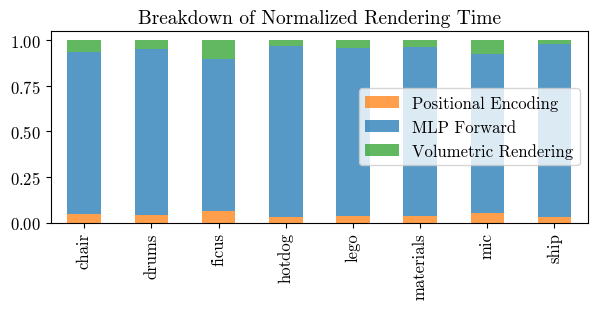

In [5]:
colors = ["tab:orange", "tab:blue", "tab:green"]
alpha = 0.75
ax = df_normalized.plot.bar(stacked=True, figsize=(6, 3.2), alpha=alpha, color=colors)
ax.set_title("Breakdown of Normalized Rendering Time")
ax.legend(loc='right')
ax.figure.tight_layout()
ax.figure.savefig("figures/normalized-rendering-time-breakdown.pdf")

### Rendering Time Breakdown
Absolute time, so axis are different

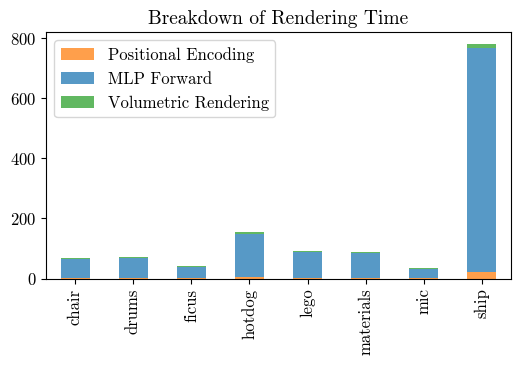

In [6]:
ax = df.plot.bar(stacked=True, figsize=(6, 3.2), alpha=alpha, color=colors)
ax.set_title("Breakdown of Rendering Time")
ax.figure.savefig("figures/rendering-time-breakdown.pdf")